# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

('Number of data points in train data', (109248, 17))
--------------------------------------------------
('The attributes of data :', array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved'], dtype=object))


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

('Number of data points in train data', (1541272, 4))
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)

In [7]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [8]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [9]:
project_data["project_grade_category"] = project_grade_category

In [10]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_subject_categories  \
55660           CA 2016-04-27 00:27:36             Math & Science   
76127           UT 2016-04-27 00:31:25              Special Needs   
51140           CA 2016-04-27 00:46:53        Literacy & Language   
473             GA 2016-04-27 00:53:00           Applied Learning   
41558           WA 2016-04-27 01:05:25        Literacy & Language   

                 project_subject_subcategories  \
55660  Applied Sciences, Health & Life Science   
76127                            Special Needs   
51140                                 Literacy   
473                          Early Development   
41558                                 Literacy   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category  
55660          Grades_PreK-2  
76127             Grades_6-8  
51140             Grades_6-8  
473            Grades_PreK-2  
41558          Grades_PreK-2

## 1.2 preprocessing of `project_subject_categories`

In [11]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [12]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Clean Titles (Text preprocessing)

In [13]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    clean_titles.append(title.lower().strip())

100%|██████████| 109248/109248 [00:04<00:00, 25259.41it/s]


In [16]:
project_data["clean_titles"] = clean_titles

In [17]:
project_data.drop(['project_title'], axis=1, inplace=True)

## 1.5 Introducing new feature "Number of Words in Title"

In [18]:
title_word_count = []

In [19]:
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)

In [20]:
project_data["title_word_count"] = title_word_count

In [21]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category   clean_categories  \
55660          Grades_PreK-2       Math_Science   
76127             Grades_6-8       SpecialNeeds   
51140             Grades_6-8  Literacy_Language   
473            Grades_PreK-2    AppliedLearning   
41558          Grades_PreK-2  Literacy_Language   

                      clean_subcategories  \
55660  AppliedSciences Health_LifeScience   
76127                        SpecialNeeds   
51140                            Literacy   
473                      EarlyDevelopment   
41558                            Literacy   

                                  clean_titles  title_word_count  
55660      engineering steam primary classroom                 4  
76127                      sensory tools focus                 3  
51140  mobile learning mobile listening center                 5  
473         flexible seating flexible learning                 4  
41558        going deep the art inner thinking                 6

## 1.6 Combine 4 Project essays into 1 Essay 

In [22]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

## 1.7 Clean Essays (Text preprocessing)

In [23]:
clean_essay = []

for ess in tqdm(project_data["essay"]):
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    clean_essay.append(ess.lower().strip())

100%|██████████| 109248/109248 [01:01<00:00, 1768.64it/s]


In [24]:
project_data["clean_essays"] = clean_essay

In [25]:
project_data.drop(['essay'], axis=1, inplace=True)

## 1.8 Introducing new feature "Number of Words in Essay"

In [26]:
essay_word_count = []

In [27]:
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)

In [28]:
project_data["essay_word_count"] = essay_word_count

In [29]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category   clean_categories  \
55660          Grades_PreK-2       Math_Science   
76127             Grades_6-8       SpecialNeeds   
51140             Grades_6-8  Literacy_Language   
473            Grades_PreK-2    AppliedLearning   
41558          Grades_PreK-2  Literacy_Language   

                      clean_subcategories  \
55660  AppliedSciences Health_LifeScience   
76127                        SpecialNeeds   
51140                            Literacy   
473                      EarlyDevelopment   
41558                            Literacy   

                                  clean_titles  title_word_count  \
55660      engineering steam primary classroom                 4   
76127                      sensory tools focus                 3   
51140  mobile learning mobile listening center                 5   
473         flexible seating flexible learning                 4   
41558        going deep the art inner thinking                 6   

                              

## 1.9 Calculate Sentiment Scores for the essays

In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
analyser = SentimentIntensityAnalyzer()

In [32]:
neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["clean_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|██████████| 109248/109248 [20:36<00:00, 88.32it/s] 


In [33]:
project_data["pos"] = pos

In [34]:
project_data["neg"] = neg

In [35]:
project_data["neu"] = neu

In [36]:
project_data["compound"] = compound

In [37]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4    ...     \
55660  It is challenging to develop high quality scie...    ...      
76127  When my students are able to calm themselves d...    ...      
51140  A mobile listening center will help keep equip...    ...      
473    Benjamin Franklin once said, \"Tell me and I f...    ...      
41558  These remarkable gifts will provide students w...    ...      

        clean_categories                 clean_subcategories  \
55660       Math_Science  AppliedSciences Health_LifeScience   
76127       SpecialNeeds                        SpecialNeeds   
51140  Literacy_Language                            Literacy   
473      AppliedLearning                    EarlyDevelopment   
41558  Literacy_Language                            Literacy   

                                  clean_titles title_word_count  \
55660      engineering steam primary classroom                4   
76127                      sensory tools focus                3   
51140  mobile learning mobile listening center                5   
473         flexible seating flexible learning                4   
41558        going deep the art inner thinking                6   

                                            clean_essays essay_word_count  \
55660  i fortunate enough use fairy tale stem kits cl...              175   
76127  imagine 8 9 years old you third grade classroo...              179   
51140  having class 24 students comes diverse learner...              116   
473    i recently read article giving students choice...              127   
41558  my students crave challenge eat obstacles brea...              114   

         pos    neg    neu  compound  
55660  0.205  0.013  0.783    0.9867  
76127  0.248  0.072  0.680    0.9897  
51140  0.262  0.017  0.721    0.9860  
473    0.187  0.030  0.783    0.9524  
41558  0.288  0.029  0.683    0.9873  

[5 rows x 24 columns]

## 1.10 Test - Train Split

In [38]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [39]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

## Preparing data for models

In [40]:
project_data.columns

Index([u'Unnamed: 0', u'id', u'teacher_id', u'teacher_prefix', u'school_state',
       u'Date', u'project_essay_1', u'project_essay_2', u'project_essay_3',
       u'project_essay_4', u'project_resource_summary',
       u'teacher_number_of_previously_posted_projects', u'project_is_approved',
       u'project_grade_category', u'clean_categories', u'clean_subcategories',
       u'clean_titles', u'title_word_count', u'clean_essays',
       u'essay_word_count', u'pos', u'neg', u'neu', u'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## 2.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

## One Hot Encode - Clean Categories of Projects

In [41]:
# we use count vectorizer to convert the values into one 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['SpecialNeeds', 'Music_Arts', 'Math_Science', 'Health_Sports', 'Care_Hunger', 'Literacy_Language', 'AppliedLearning', 'History_Civics', 'Warmth']
('Shape of matrix of Train data after one hot encoding ', (49041, 9))
('Shape of matrix of Test data after one hot encoding ', (36052, 9))
('Shape of matrix of CV data after one hot encoding ', (24155, 9))


## One Hot Encode - Clean Sub-Categories of Projects

In [42]:
# we use count vectorizer to convert the values into one 

vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)


print(vectorizer_sub_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Health_Wellness', 'Literature_Writing', 'CommunityService', 'Care_Hunger', 'AppliedSciences', 'SocialSciences', 'Other', 'Music', 'Mathematics', 'Warmth', 'EnvironmentalScience', 'ForeignLanguages', 'NutritionEducation', 'TeamSports', 'Extracurricular', 'Literacy', 'SpecialNeeds', 'PerformingArts', 'Health_LifeScience', 'Economics', 'ParentInvolvement', 'EarlyDevelopment', 'FinancialLiteracy', 'ESL', 'Civics_Government', 'CharacterEducation', 'History_Geography', 'VisualArts', 'College_CareerPrep', 'Gym_Fitness']
('Shape of matrix of Train data after one hot encoding ', (49041, 30))
('Shape of matrix of Test data after one hot encoding ', (36052, 30))
('Shape of matrix of Cross Validation data after one hot encoding ', (24155, 30))


## One Hot Encode - School States

In [43]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [44]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [45]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_states = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_states.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_states.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_states.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_states.transform(X_cv['school_state'].values)

print(vectorizer_states.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

['WA', 'DE', 'DC', 'WI', 'WV', 'HI', 'FL', 'WY', 'NH', 'NJ', 'NM', 'TX', 'LA', 'NC', 'ND', 'NE', 'TN', 'NY', 'PA', 'RI', 'NV', 'VA', 'CO', 'AK', 'AL', 'AR', 'VT', 'IL', 'GA', 'IN', 'IA', 'MA', 'AZ', 'CA', 'ID', 'CT', 'ME', 'MD', 'OK', 'OH', 'UT', 'MO', 'MN', 'MI', 'KS', 'MT', 'MS', 'SC', 'KY', 'OR', 'SD']
('Shape of matrix of Train data after one hot encoding ', (49041, 51))
('Shape of matrix of Test data after one hot encoding ', (36052, 51))
('Shape of matrix of Cross Validation data after one hot encoding ', (24155, 51))


## One Hot Encode - Project Grade Category 

In [46]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [47]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [48]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['Grades_6-8', 'Grades_9-12', 'Grades_PreK-2', 'Grades_3-5']
('Shape of matrix of Train data after one hot encoding ', (49041, 4))
('Shape of matrix of Test data after one hot encoding ', (36052, 4))
('Shape of matrix of Cross Validation data after one hot encoding ', (24155, 4))


## One Hot Encode - Teacher Prefix

In [49]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [50]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [51]:
## we use count vectorizer to convert the values into one hot encoded features
## Unlike the previous Categories this category returns a
## ValueError: np.nan is an invalid document, expected byte or unicode string.
## The link below explains h0w to tackle such discrepancies.
## https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809#39308809

vectorizer_teacher = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_teacher.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values.astype("U"))

print(vectorizer_teacher.get_feature_names())

print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)

['nan', 'Mrs.', 'Ms.', 'Mr.', 'Dr.', 'Teacher']
('Shape of matrix after one hot encoding ', (49041, 6))
('Shape of matrix after one hot encoding ', (36052, 6))
('Shape of matrix after one hot encoding ', (24155, 6))


## 2.2 Vectorizing Text data

## A) Bag of Words (BOW) with min_df=10 

### Bag of words - Train Data - Essays

In [52]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).

vectorizer_bow_essay = CountVectorizer(min_df=10)

vectorizer_bow_essay.fit(X_train["clean_essays"])

text_bow_train = vectorizer_bow_essay.transform(X_train["clean_essays"])

print("Shape of matrix after one hot encoding ",text_bow_train.shape)

('Shape of matrix after one hot encoding ', (49041, 12164))


### Bag of words - Test Data - Essays

In [53]:
text_bow_test = vectorizer_bow_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

('Shape of matrix after one hot encoding ', (36052, 12164))


### Bag of words - Cross Validation Data - Essays

In [54]:
text_bow_cv = vectorizer_bow_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

('Shape of matrix after one hot encoding ', (24155, 12164))


### Bag of words - Train Data - Titles

In [55]:
vectorizer_bow_title = CountVectorizer(min_df=10)

vectorizer_bow_title.fit(X_train["clean_titles"])

title_bow_train = vectorizer_bow_title.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

('Shape of matrix after one hot encoding ', (49041, 2082))


### Bag of words - Test Data - Titles

In [56]:
title_bow_test = vectorizer_bow_title.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

('Shape of matrix after one hot encoding ', (36052, 2082))


### Bag of words - Cross Validation Data - Titles

In [57]:
title_bow_cv = vectorizer_bow_title.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

('Shape of matrix after one hot encoding ', (24155, 2082))


## B) TFIDF vectorizer with min_df=10

### TFIDF - Train Data - Essays

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(X_train["clean_essays"])

text_tfidf_train = vectorizer_tfidf_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

('Shape of matrix after one hot encoding ', (49041, 12164))


### TFIDF - Test Data - Essays

In [59]:
text_tfidf_test = vectorizer_tfidf_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

('Shape of matrix after one hot encoding ', (36052, 12164))


### TFIDF - Cross Validation Data - Essays

In [60]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

('Shape of matrix after one hot encoding ', (24155, 12164))


### TFIDF - Train Data - Titles

In [61]:
vectorizer_tfidf_titles = TfidfVectorizer(min_df=10)

vectorizer_tfidf_titles.fit(X_train["clean_titles"])
title_tfidf_train = vectorizer_tfidf_titles.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

('Shape of matrix after one hot encoding ', (49041, 2082))


### TFIDF - Test Data - Titles

In [62]:
title_tfidf_test = vectorizer_tfidf_titles.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

('Shape of matrix after one hot encoding ', (36052, 2082))


### TFIDF - Cross Validation Data - Titles

In [63]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

('Shape of matrix after one hot encoding ', (24155, 2082))


## C) Using Pretrained Models : AVG W2V

In [64]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

def loadGloveModel(gloveFile):
    
    print ("Loading Glove Model")
    
    f = open(gloveFile,'r')
    
    model = {}
    
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    
    print ("Done.",len(model)," words loaded!")
    
    return model

In [65]:
model = loadGloveModel('glove.42B.300d.txt')

1815it [00:00, 8856.91it/s]

Loading Glove Model


1917495it [03:47, 8445.52it/s]

('Done.', 1917495, ' words loaded!')


In [67]:
words_train_essays = []

for i in X_train["clean_essays"] :
    words_train_essays.extend(i.split(' '))

In [68]:
## Find the total number of words in the Train data of Essays.

print("All the words in the corpus", len(words_train_essays))

('All the words in the corpus', 7432738)


In [69]:
## Find the unique words in this set of words

words_train_essay = set(words_train_essays)
print("the unique words in the corpus", len(words_train_essay))

('the unique words in the corpus', 41337)


In [70]:
## Find the words present in both Glove Vectors as well as our corpus.

inter_words = set(model.keys()).intersection(words_train_essay)

print("The number of words that are present in both glove vectors and our corpus are {} which \
is nearly {}% ".format(len(inter_words), np.round((float(len(inter_words))/len(words_train_essay))*100)))

The number of words that are present in both glove vectors and our corpus are 37939 which is nearly 92.0% 


In [71]:
words_corpus_train_essay = {}

words_glove = set(model.keys())

for i in words_train_essay:
    if i in words_glove:
        words_corpus_train_essay[i] = model[i]

print("word 2 vec length", len(words_corpus_train_essay))

('word 2 vec length', 37939)


In [72]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus_train_essay, f)

In [73]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### Train - Essays

In [74]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [00:17<00:00, 2824.58it/s]

49041
300


### Test - Essays

In [75]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:11<00:00, 3194.27it/s]

36052
300


### Cross-Validation - Essays

In [76]:
avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [00:07<00:00, 3228.53it/s]

24155
300


### Train - Titles

In [77]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 48690.76it/s]

49041
300


### Test - Titles

In [78]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 51815.07it/s]

36052
300


### Cross-Validation - Titles

In [79]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 41295.19it/s]

24155
300


## D) Using Pretrained Models: TFIDF weighted W2V

### Train - Essays

In [80]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [81]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [01:45<00:00, 463.76it/s]

49041
300


### Test - Essays

In [82]:
# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [01:14<00:00, 486.69it/s]

36052
300


### Cross-Validation - Essays

In [83]:
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [00:51<00:00, 470.13it/s]

24155
300


### Train - Titles

In [84]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [85]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 27122.33it/s]

49041
300


### Test - Titles

In [86]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████| 36052/36052 [00:01<00:00, 27509.84it/s]

36052
300


### Cross-Validation - Titles

In [87]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(X_cv["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 27064.25it/s]

24155
300


## 2.3 Vectorizing Numerical features

In [88]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [89]:
# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

### A) Price

In [90]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


### B) Quantity

In [91]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


### C) Number of Projects previously proposed by Teacher

In [92]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


### D) Title word Count

In [93]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


### E) Essay word Count

In [94]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


### F) Essay Sentiments - pos

In [95]:
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(-1,1))

essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


### G) Essay Sentiments - neg

In [96]:
normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(-1,1))

essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


### H) Essay Sentiments - neu

In [97]:
normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(-1,1))

essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


### I) Essay Sentiments - compound

In [98]:
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(-1,1))

essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)
print("="*100)

After vectorizations
((49041, 1), (49041,))
((24155, 1), (24155,))
((36052, 1), (36052,))


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>3. Decision Tree </h1>

## Set 1: Categorical, Numerical features + Project_title(BOW) + Preprocessed_essay (BOW with min_df=10)

In [854]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv, title_bow_cv, text_bow_cv)).tocsr()

In [855]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((49041, 14355), (49041,))
((24155, 14355), (24155,))
((36052, 14355), (36052,))


# GraphViz - Decision Tree 

In [873]:
bow_features_names = []

In [874]:
## Obtain Feature names for Project titles

for a in vectorizer_proj.get_feature_names() :
    bow_features_names.append(a)

In [875]:
## Obtain Feature names for Project Sub-titles
for a in vectorizer_sub_proj.get_feature_names() :
    bow_features_names.append(a)

In [876]:
## Obtain Feature names for states 
for a in vectorizer_states.get_feature_names() :
    bow_features_names.append(a)

In [877]:
## Obtain Feature names for Project Grade Category
for a in vectorizer_grade.get_feature_names() :
    bow_features_names.append(a)

In [878]:
## Obtain Feature names for Teacher Title
for a in vectorizer_teacher.get_feature_names() :
    bow_features_names.append(a)

In [879]:
len(bow_features_names)

100

In [880]:
bow_features_names.append("price")

In [881]:
bow_features_names.append("quantity")

In [882]:
bow_features_names.append("prev_proposed_projects")

In [883]:
bow_features_names.append("title_word_count")

In [884]:
bow_features_names.append("essay_word_count")

In [885]:
bow_features_names.append("pos")

In [886]:
bow_features_names.append("neg")

In [887]:
bow_features_names.append("neu")

In [888]:
bow_features_names.append("compound")

In [889]:
for a in vectorizer_bow_title.get_feature_names() :
    bow_features_names.append(a)

In [890]:
for a in vectorizer_bow_essay.get_feature_names() :
    bow_features_names.append(a)

In [891]:
len(bow_features_names)

14355

In [892]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)

In [893]:
clf = dtree.fit(X_tr, y_train)

In [901]:
# Visualize data
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=bow_features_names)
graph = graphviz.Source(dot_data) 
graph.render("Bow tree",view = True)


'Bow tree.pdf'

<img src='bow_tree.png' >

# A) GridSearchCV (K fold Cross Validation)

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

In [107]:
dt = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [115]:
train_auc

array([0.55379401, 0.55379401, 0.55379401, 0.55379401, 0.62186872,
       0.62195555, 0.62172435, 0.62070044, 0.66960162, 0.66877661,
       0.66406042, 0.65707231, 0.88998191, 0.88035456, 0.84900323,
       0.79096785, 0.96132412, 0.95346235, 0.92892628, 0.86971055,
       0.99868588, 0.99399841, 0.97647344, 0.94158976, 0.96073969,
       0.95379484, 0.92729997, 0.87092898])

In [133]:
cv_auc

array([0.55379511, 0.55379511, 0.55379511, 0.55379511, 0.60704846,
       0.60682437, 0.6069315 , 0.60726628, 0.61346406, 0.61392381,
       0.61498828, 0.61709517, 0.53151066, 0.53043885, 0.56015515,
       0.59429726, 0.50424444, 0.50871784, 0.53404116, 0.57818964,
       0.51841058, 0.52232696, 0.5362443 , 0.55774138, 0.50478568,
       0.50695733, 0.53412019, 0.57338137])

# Plot for Train Data

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

In [122]:
import plotly
plotly.tools.set_credentials_file(username='harris13', api_key='rATYeYDgdcxNImJkbzlt')

In [552]:
x1 = [0.55379401, 0.55379401, 0.55379401, 0.55379401, 0.62186872,
       0.62195555, 0.62172435, 0.62070044, 0.66960162, 0.66877661,
       0.66406042, 0.65707231, 0.88998191, 0.88035456, 0.84900323,
       0.79096785, 0.96132412, 0.95346235, 0.92892628, 0.86971055,
       0.99868588, 0.99399841, 0.97647344, 0.94158976]

In [553]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500],index = x1)

In [554]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [555]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [556]:
data = [trace]

In [557]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [558]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-a', height=700)

# Plot for Cross Validation Data

In [730]:
x2 = [0.55379511, 0.55379511, 0.55379511, 0.55379511, 0.60704846,
       0.60682437, 0.6069315 , 0.60726628, 0.61346406, 0.61392381,
       0.61498828, 0.61709517, 0.53151066, 0.53043885, 0.56015515,
       0.59429726, 0.50424444, 0.50871784, 0.53404116, 0.57818964,
       0.51841058, 0.52232696, 0.5362443 , 0.55774138]

In [731]:
y2 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x2)

In [732]:
z2 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500],index = x2)

In [733]:
trace = go.Scatter3d(
    x=x2, y=y2, z=z2,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [734]:
data = [trace]

In [735]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Cross Validation Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [736]:
fig = dict(data=data, layout=layout) 

py.iplot(fig, filename='Decision-trees-b', height=900)

## Observations : 

### 1) We understand from the 2 plots that the Decision Tree with a depth of 100 & 500 performs great on Training Data but performs pretty bad on unseen data (cross validation data) . => Probably a case of Overfitting.

### 2) Decision trees with depth 1 & 5 performs poor on both Train data as well as Cross Validation Data. =>Probably a case of Underfitting.

### 3) Decision Tree with maximum depth 10, performs decently on both Train as well as Cross Validation Data.

### 4) 100 as the value for Minimum samples per split is considered.

# B) Train the model using the best hyper parameter value

In [173]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

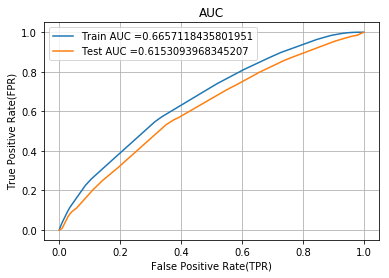

In [177]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 100)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [175]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data 

In [178]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.2499764985254638, 'for threshold', 0.838)
[[ 3749  3677]
 [11714 29901]]


In [179]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.2499764985254638, 'for threshold', 0.838)


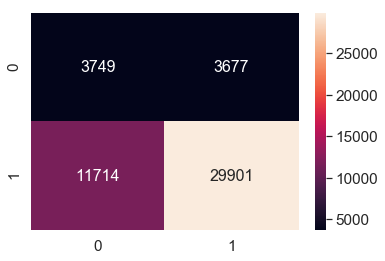

In [762]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [180]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24784359793657065, 'for threshold', 0.838)
[[ 2476  2983]
 [ 9000 21593]]


In [181]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24784359793657065, 'for threshold', 0.838)


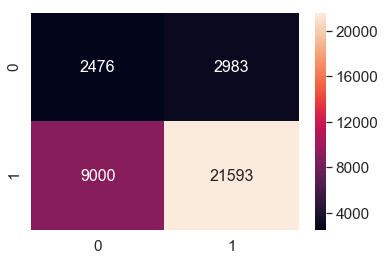

In [763]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# `LET US UNDERSTAND WHY OUR MODEL PERFORMS BAD BY ANALYSING THE FALSE POSITIVE POINTS`

# D) Obtaining the False Positive words from BOW encoded Essays

In [195]:
bow_test = text_bow_test.todense()

In [199]:
bow_test.shape

(36052, 12164)

In [201]:
vectorizer_bow_essay = CountVectorizer(min_df=10)

av = vectorizer_bow_essay.fit(X_train["clean_essays"])

In [203]:
bow_features = av.get_feature_names()

In [204]:
len(bow_features)

12164

In [216]:
y_test_converted = list(y_test[::])

In [375]:
false_positives_index_a = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.839:
        false_positives_index_a.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|██████████| 36052/36052 [00:00<00:00, 773349.60it/s]


In [376]:
fp_count

3332

In [377]:
false_positives_index_a[0:5]

[7, 9, 21, 39, 42]

In [387]:
df1 = pd.DataFrame(bow_test)

In [388]:
df1_final = df1.iloc[false_positives_index_a,:]

In [402]:
df1_final.shape

(3332, 12164)

In [395]:
df1_final[0].sum()

16

In [398]:
best_indices = []

for j in range(12164):
    
    s = df1_final[j].sum()
    
    if s >= 100 :
        best_indices.append(j)
    else :
        continue
        

In [400]:
len(best_indices)

735

In [412]:
best_indices[0:10]

[3, 73, 89, 110, 132, 149, 164, 190, 213, 214]

In [413]:
bow_features[0:10]

[u'00',
 u'000',
 u'10',
 u'100',
 u'1000',
 u'100th',
 u'101',
 u'102',
 u'103',
 u'104']

In [408]:
fp_words = []

for a in best_indices :
    fp_words.append(str(bow_features[a]))

In [411]:
fp_words[0:10]

['100',
 '21st',
 '2nd',
 '3rd',
 '4th',
 '5th',
 '6th',
 '8th',
 'abilities',
 'ability']

# E) Word Cloud for False Positives words

In [420]:
from wordcloud import WordCloud

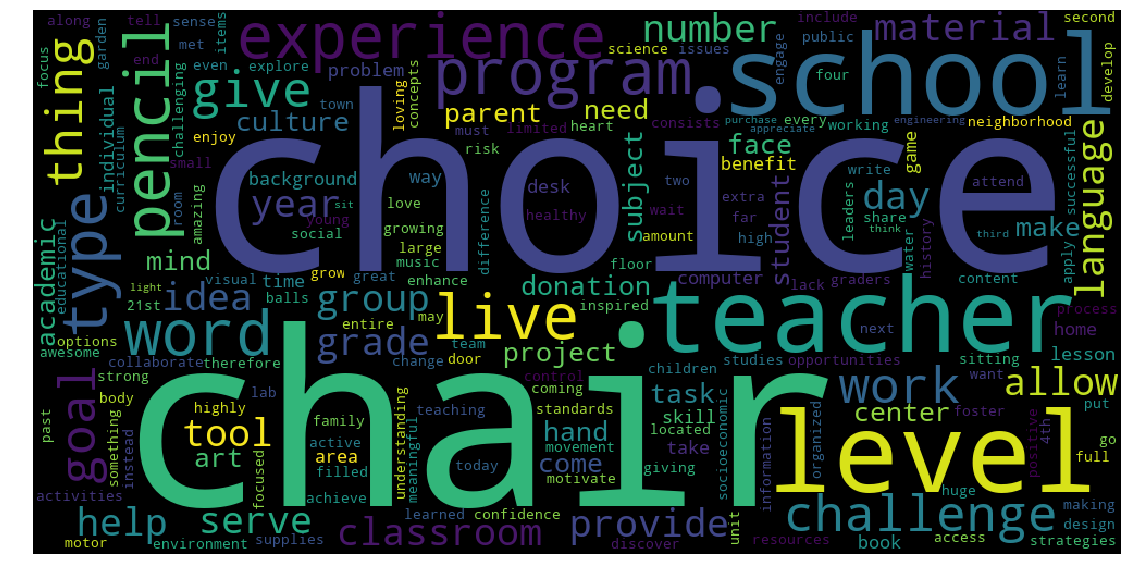

In [422]:
#convert list to string and generate
unique_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

# F) Box - Plot with the price of these False positive data points

In [439]:
len(false_positives_index_a)

3332

In [440]:
df2 = pd.DataFrame(X_test['price'])

In [441]:
df2_final = df2.iloc[false_positives_index_a,:]

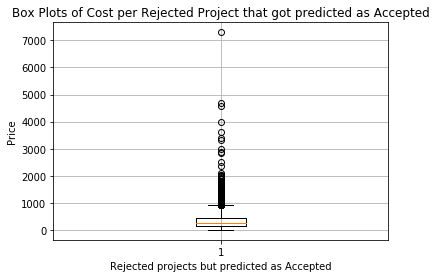

In [445]:
plt.boxplot(df2_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

## Inference 

### 1) Majority of the projects that were rejected but predicted as accepted Costs almost less than 500 Dollars.

### 2) A Few of them are Extremely costs costing more than 3000 Dollars.

# G) PDF with the `Teacher_number_of_previously_posted_projects` of these `False Positive` data points

In [446]:
df3 = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [447]:
df3_final = df3.iloc[false_positives_index_a,:]

In [448]:
df3_final.shape

(3332, 1)

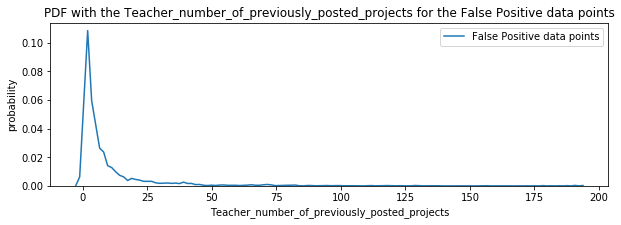

In [450]:
plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

## Inference 

### Majority of the cases have Teachers with previously posted projects as 0 (which is nearly 10% of the total data)

## Set 2 : Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay (TFIDF min_df=10)

In [940]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, title_tfidf_test, text_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv, title_tfidf_cv, text_tfidf_cv)).tocsr()

In [941]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((49041, 14355), (49041,))
((24155, 14355), (24155,))
((36052, 14355), (36052,))


# GraphViz - Decision Tree 

In [942]:
tfidf_features_names = []

In [943]:
## Obtain Feature names for Project titles

for a in vectorizer_proj.get_feature_names() :
    tfidf_features_names.append(a)

In [944]:
## Obtain Feature names for Project Sub-titles
for a in vectorizer_sub_proj.get_feature_names() :
    tfidf_features_names.append(a)

In [945]:
## Obtain Feature names for states 
for a in vectorizer_states.get_feature_names() :
    tfidf_features_names.append(a)

In [946]:
## Obtain Feature names for Project Grade Category
for a in vectorizer_grade.get_feature_names() :
    tfidf_features_names.append(a)

In [947]:
## Obtain Feature names for Teacher Title
for a in vectorizer_teacher.get_feature_names() :
    tfidf_features_names.append(a)

In [948]:
tfidf_features_names.append("price")

In [949]:
tfidf_features_names.append("quantity")

In [950]:
tfidf_features_names.append("prev_proposed_projects")

In [951]:
tfidf_features_names.append("title_word_count")

In [952]:
tfidf_features_names.append("essay_word_count")

In [953]:
tfidf_features_names.append("positive_sentiment")

In [954]:
tfidf_features_names.append("negative_sentiment")

In [955]:
tfidf_features_names.append("neutral_sentiment")

In [956]:
tfidf_features_names.append("compound")

In [957]:
for a in vectorizer_tfidf_titles.get_feature_names() :
    tfidf_features_names.append(a)

In [958]:
for a in vectorizer_tfidf_essay.get_feature_names() :
    tfidf_features_names.append(a)

In [959]:
len(tfidf_features_names)

14355

In [960]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)

In [961]:
clf = dtree.fit(X_tr, y_train)

In [963]:
# Visualize data
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=tfidf_features_names)
graph = graphviz.Source(dot_data) 
graph.render("Tfidf tree",view = True)


'Tfidf tree.pdf'

<img src='tfidf_tree.png' >

# A) GridSearchCV (K fold Cross Validation)

In [453]:
dt_2 = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt_2, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [454]:
train_auc

array([0.55414202, 0.55414202, 0.55414202, 0.55414202, 0.62557543,
       0.62557632, 0.62525254, 0.62463716, 0.66468217, 0.6637568 ,
       0.657738  , 0.65307295, 0.8638033 , 0.85838062, 0.8317363 ,
       0.78502406, 0.93969972, 0.93546971, 0.90922202, 0.86973412,
       0.99922598, 0.99578317, 0.97935229, 0.95782149, 0.99930831,
       0.99587769, 0.97930599, 0.95770073])

In [455]:
cv_auc

array([0.55252614, 0.55252614, 0.55252614, 0.55252614, 0.60866846,
       0.60872955, 0.60906469, 0.60944631, 0.60622811, 0.60542485,
       0.60851484, 0.61035282, 0.52197247, 0.52457173, 0.55068756,
       0.58405304, 0.48908978, 0.49977513, 0.51890075, 0.55436636,
       0.52250726, 0.52442526, 0.54039826, 0.55718187, 0.52769245,
       0.53181894, 0.54450628, 0.56214113])

# Plot for Train Data

In [1]:
x1 = [0.55414202, 0.55414202, 0.55414202, 0.55414202, 0.62557543,
       0.62557632, 0.62525254, 0.62463716, 0.66468217, 0.6637568 ,
       0.657738  , 0.65307295, 0.8638033 , 0.85838062, 0.8317363 ,
       0.78502406, 0.93969972, 0.93546971, 0.90922202, 0.86973412,
       0.99922598, 0.99578317, 0.97935229, 0.95782149, 0.99930831,
       0.99587769, 0.97930599, 0.95770073]

In [4]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [5]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000],index = x1)

In [9]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

NameError: name 'z' is not defined

In [570]:
data = [trace]

In [571]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [572]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-c', height=900)

# Plot for Cross Validation Data

In [573]:
x1 = [0.55252614, 0.55252614, 0.55252614, 0.55252614, 0.60866846,
       0.60872955, 0.60906469, 0.60944631, 0.60622811, 0.60542485,
       0.60851484, 0.61035282, 0.52197247, 0.52457173, 0.55068756,
       0.58405304, 0.48908978, 0.49977513, 0.51890075, 0.55436636,
       0.52250726, 0.52442526, 0.54039826, 0.55718187, 0.52769245,
       0.53181894, 0.54450628, 0.56214113]

In [574]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [575]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000],index = x1)

In [576]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [577]:
data = [trace]

In [578]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Cross Validation Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [579]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-d', height=900)

## Observations : 

### 1) We understand from the 2 plots that the Decision Tree with a depth of 100, 500, 1000 performs great on Training Data but performs pretty bad on unseen data (cross validation data) . => Probably a case of Overfitting.

### 2) Decision trees with depth 1 & 5 performs poor on both Train data as well as Cross Validation Data. =>Probably a case of Underfitting.

### 3) Decision Tree with maximum depth 10, performs fairly well on both Train as well as Cross Validation Data.

### 4) 500 as the value for Minimum samples per split is considered.

# B) Train the model using the best hyper parameter value

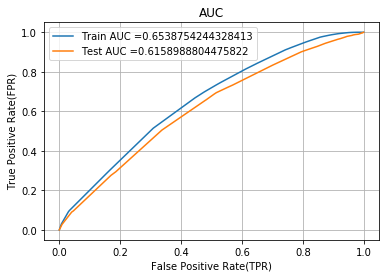

In [470]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

### Train Data 

In [471]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24976844882071556, 'for threshold', 0.835)
[[ 3826  3600]
 [12248 29367]]


In [472]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24976844882071556, 'for threshold', 0.835)


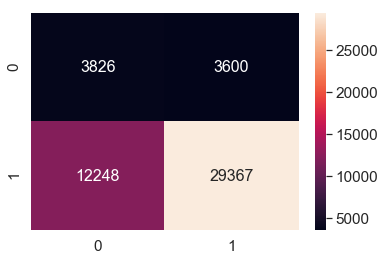

In [764]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data 

In [473]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24991442309657286, 'for threshold', 0.847)
[[ 2679  2780]
 [ 9558 21035]]


In [474]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24991442309657286, 'for threshold', 0.847)


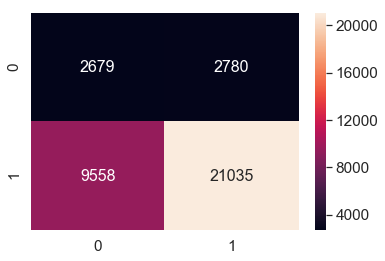

In [765]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

# `LET US UNDERSTAND WHY OUR MODEL PERFORMS BAD BY ANALYSING THE FALSE POSITIVE POINTS`

# D) Obtaining the False Positive words from TFIDF encoded Essays

In [475]:
tfidf_test = text_tfidf_test.todense()

In [476]:
tfidf_test.shape

(36052, 12164)

In [477]:
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
bv = vectorizer_tfidf_essay.fit(X_train["clean_essays"])

In [478]:
tfidf_features = bv.get_feature_names()

In [479]:
len(tfidf_features)

12164

In [480]:
y_test_converted = list(y_test[::])

In [487]:
false_positives_index_b = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.84:
        false_positives_index_b.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|██████████| 36052/36052 [00:00<00:00, 711028.68it/s]


In [488]:
fp_count

2679

In [489]:
false_positives_index_b[0:5]

[7, 9, 21, 40, 42]

In [490]:
df2 = pd.DataFrame(tfidf_test)

In [491]:
df2_final = df2.iloc[false_positives_index_b,:]

In [492]:
df2_final.shape

(2679, 12164)

In [501]:
best_indices_b = []

for j in range(12164):
    
    s = df2_final[j].sum()
    
    if s >= 10 :
        best_indices_b.append(j)
    else :
        continue
        

In [502]:
len(best_indices_b)

502

In [503]:
best_indices_b[0:10]

[3, 213, 214, 216, 243, 244, 259, 310, 341, 348]

In [504]:
tfidf_features[0:10]

[u'00',
 u'000',
 u'10',
 u'100',
 u'1000',
 u'100th',
 u'101',
 u'102',
 u'103',
 u'104']

In [505]:
fp_words_b = []

for a in best_indices_b :
    fp_words_b.append(str(tfidf_features[a]))

In [506]:
fp_words_b[0:10]

['100',
 'abilities',
 'ability',
 'able',
 'academic',
 'academically',
 'access',
 'achieve',
 'active',
 'activities']

# E) Word Cloud for False Positives words

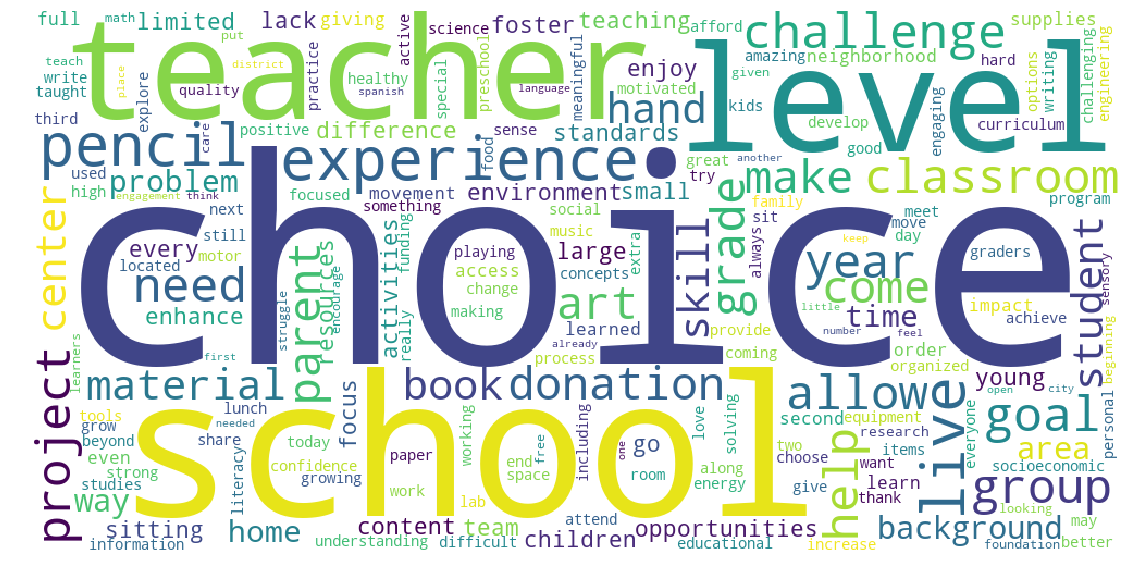

In [507]:
#convert list to string and generate
unique_string=(" ").join(fp_words_b)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# F) Box - Plot with the price of these False positive data points

In [508]:
df2_b = pd.DataFrame(X_test['price'])

In [509]:
df2_b_final = df2_b.iloc[false_positives_index_b,:]

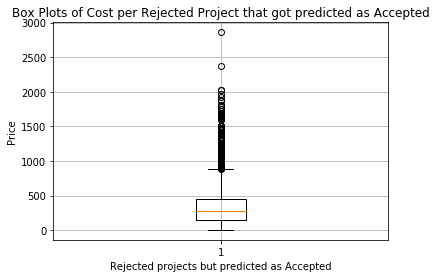

In [510]:
plt.boxplot(df2_b_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

## Inference 

### 1) Majority of the projects that were rejected but predicted as accepted Costs almost less than 500 Dollars.

### 2) Good number of incorrectly prediced projects cost around 1000 - 2000 Dollars.

### 3) A Few of them are Extremely costly costing more than 2000 Dollars.

# G) PDF with the `Teacher_number_of_previously_posted_projects` of these `False Positive` data points

In [511]:
df3_b = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [512]:
df3_b_final = df3_b.iloc[false_positives_index_b,:]

In [513]:
df3_b_final.shape

(2679, 1)

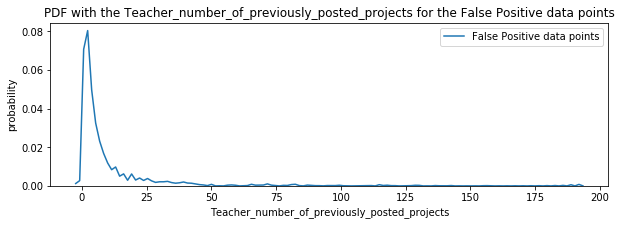

In [514]:
plt.figure(figsize=(10,3))
sns.distplot(df3_b_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

## Inference 

### 1) Majority of the cases have Teachers with previously posted projects as 0.

### 2) Good percent of Teachers have 10 or fewer projects previously posted projects.

## Set 3 : Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V)

In [738]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [739]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((49041, 709), (49041,))
((24155, 709), (24155,))
((36052, 709), (36052,))


# A) GridSearchCV (K fold Cross Validation)

In [740]:
dt_3 = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt_3, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [741]:
train_auc

array([0.56014514, 0.56014514, 0.56014514, 0.56014514, 0.64871449,
       0.64869056, 0.64866567, 0.64820043, 0.74776211, 0.74591092,
       0.72233699, 0.69639486, 0.99546972, 0.9921951 , 0.93719352,
       0.8334787 , 0.9994709 , 0.99610023, 0.94735628, 0.84723474,
       0.9995031 , 0.99613975, 0.94736153, 0.84608141, 0.99950217,
       0.99631346, 0.94677657, 0.84529342])

In [742]:
cv_auc

array([0.54994299, 0.54994299, 0.54994299, 0.54994299, 0.59901252,
       0.598989  , 0.59896788, 0.59898952, 0.56134242, 0.56065941,
       0.58262686, 0.60034578, 0.49767982, 0.5022357 , 0.53914182,
       0.58028238, 0.52615212, 0.52541209, 0.55312638, 0.58575166,
       0.52397505, 0.53049051, 0.5506415 , 0.58266807, 0.52738857,
       0.53262066, 0.5573048 , 0.58502679])

# Plot for Train Data

In [743]:
x1 = [0.56014514, 0.56014514, 0.56014514, 0.56014514, 0.64871449,
       0.64869056, 0.64866567, 0.64820043, 0.74776211, 0.74591092,
       0.72233699, 0.69639486, 0.99546972, 0.9921951 , 0.93719352,
       0.8334787 , 0.9994709 , 0.99610023, 0.94735628, 0.84723474,
       0.9995031 , 0.99613975, 0.94736153, 0.84608141, 0.99950217,
       0.99631346, 0.94677657, 0.84529342]

In [744]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [745]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000],index = x1)

In [746]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [747]:
data = [trace]

In [748]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [749]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-e', height=900)

# Plot for Cross Validation Data

In [750]:
x1 = [0.54994299, 0.54994299, 0.54994299, 0.54994299, 0.59901252,
       0.598989  , 0.59896788, 0.59898952, 0.56134242, 0.56065941,
       0.58262686, 0.60034578, 0.49767982, 0.5022357 , 0.53914182,
       0.58028238, 0.52615212, 0.52541209, 0.55312638, 0.58575166,
       0.52397505, 0.53049051, 0.5506415 , 0.58266807, 0.52738857,
       0.53262066, 0.5573048 , 0.58502679]

In [751]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [752]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000],index = x1)

In [753]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [754]:
data = [trace]

In [755]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Cross Validation Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [756]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-f', height=900)

## Observations : 

### 1) We understand from the 2 plots that the Decision Tree with a depth of 500, 1000 performs great on Training Data but performs pretty bad on unseen data (cross validation data) . => Probably a case of Overfitting.

### 2) Decision trees with depth 1 performs poor on both Train data as well as Cross Validation Data. =>Probably a case of Underfitting.

### 3) Decision Tree with maximum depth 5 or 10 performs fairly well on both Train as well as Cross Validation Data.

### 4) 500 as the value for Minimum samples per split is considered.

# B) Train the model using the best hyper parameter value

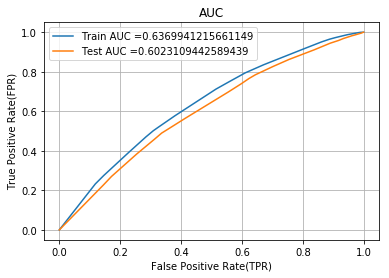

In [757]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

### Train Data 

In [758]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24978058036891368, 'for threshold', 0.849)
[[ 3603  3823]
 [11969 29646]]


In [759]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24978058036891368, 'for threshold', 0.849)


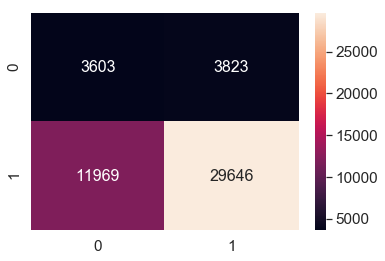

In [766]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data 

In [760]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24696985951428427, 'for threshold', 0.849)
[[ 2429  3030]
 [ 9254 21339]]


In [761]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24696985951428427, 'for threshold', 0.849)


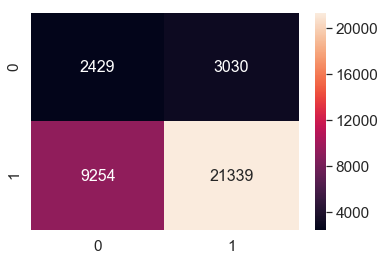

In [767]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

# Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [594]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [595]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((49041, 709), (49041,))
((24155, 709), (24155,))
((36052, 709), (36052,))


## A) GridSearchCV (3 fold Cross Validation - adjusted for train time issues) 

In [ ]:
dt_4 = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}

clf = GridSearchCV(dt_4, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [597]:
train_auc

array([0.53394363, 0.53394363, 0.53394363, 0.53394363, 0.5645948 ,
       0.56459478, 0.56459181, 0.56418497, 0.59470961, 0.59429061,
       0.5926904 , 0.58795968, 0.81706184, 0.80064687, 0.71495465,
       0.65142251, 0.84298318, 0.82331957, 0.72826982, 0.65425278,
       0.84296576, 0.82303705, 0.72829746, 0.65427424, 0.84288101,
       0.82348751, 0.72833552, 0.65391013])

In [598]:
cv_auc

array([0.52829768, 0.52829768, 0.52829768, 0.52829768, 0.55259323,
       0.55211651, 0.55210822, 0.55192606, 0.56219392, 0.56198538,
       0.56160851, 0.56146792, 0.51328374, 0.51846133, 0.53552465,
       0.54687022, 0.51201104, 0.51651549, 0.53434146, 0.54664002,
       0.51200129, 0.51681504, 0.5331341 , 0.5462221 , 0.51128543,
       0.51650336, 0.53434674, 0.54702734])

# Plot for Train Data

In [599]:
x1 = [0.53394363, 0.53394363, 0.53394363, 0.53394363, 0.5645948 ,
       0.56459478, 0.56459181, 0.56418497, 0.59470961, 0.59429061,
       0.5926904 , 0.58795968, 0.81706184, 0.80064687, 0.71495465,
       0.65142251, 0.84298318, 0.82331957, 0.72826982, 0.65425278,
       0.84296576, 0.82303705, 0.72829746, 0.65427424, 0.84288101,
       0.82348751, 0.72833552, 0.65391013]

In [600]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [601]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000],index = x1)

In [602]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [603]:
data = [trace]

In [604]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [605]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-g', height=900)

# Plot for Cross Validation Data

In [606]:
x1 = [0.52829768, 0.52829768, 0.52829768, 0.52829768, 0.55259323,
       0.55211651, 0.55210822, 0.55192606, 0.56219392, 0.56198538,
       0.56160851, 0.56146792, 0.51328374, 0.51846133, 0.53552465,
       0.54687022, 0.51201104, 0.51651549, 0.53434146, 0.54664002,
       0.51200129, 0.51681504, 0.5331341 , 0.5462221 , 0.51128543,
       0.51650336, 0.53434674, 0.54702734]

In [607]:
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = x1)

In [608]:
z1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000],index = x1)

In [609]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [610]:
data = [trace]

In [611]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Cross Validation Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [612]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-h ', height=900)

## Observations : 

### 1) We understand from the 2 plots that the Decision Tree with a depth of 500, 1000 performs great on Training Data but performs pretty bad on unseen data (cross validation data) . => Probably a case of Overfitting.

### 2) Decision trees with depth 1 performs poor on both Train data as well as Cross Validation Data. =>Probably a case of Underfitting.

### 3) Decision Tree with maximum depth 10 performs fairly well on both Train as well as Cross Validation Data.

### 4) 100 as the value for Minimum samples per split is considered.

# B) Train the model using the best hyper parameter value

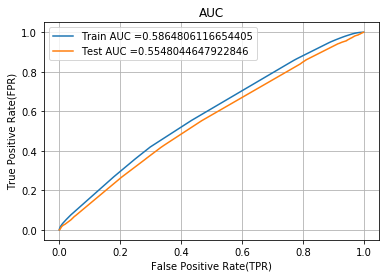

In [613]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 100)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

### Train Data

In [614]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24566381474338891, 'for threshold', 0.842)
[[ 4202  3224]
 [18573 23042]]


In [615]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24566381474338891, 'for threshold', 0.842)


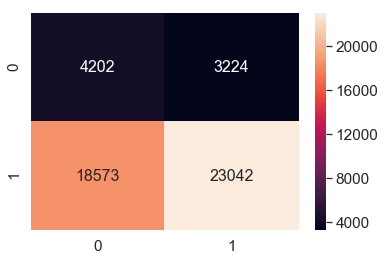

In [768]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [616]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.2488700845460545, 'for threshold', 0.848)
[[ 2913  2546]
 [13736 16857]]


In [617]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.2488700845460545, 'for threshold', 0.848)


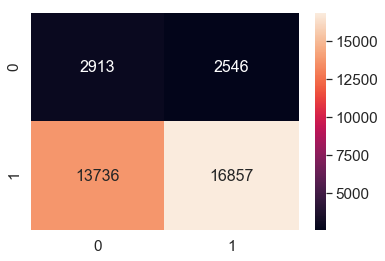

In [769]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

# [Task 2] Select best 5k features from Set 2

In [618]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, title_tfidf_test, text_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_comp_cv, title_tfidf_cv, text_tfidf_cv)).tocsr()

In [619]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((49041, 14355), (49041,))
((24155, 14355), (24155,))
((36052, 14355), (36052,))


In [662]:
## Fit the Model to obtain the best 5k features

model = DecisionTreeClassifier()

model.fit(X_tr, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [663]:
## Compute the Feature importances for our Train Features

a=model.tree_.compute_feature_importances(normalize=False)

In [664]:
df9 = pd.DataFrame(a)

In [665]:
df9 = np.transpose(df9)

In [666]:
## Store the indexes of the features with atleast some importance. Lets ignore the features with 0
## as the feature importance value and instead consider all the values other than these 

best_ind = []

for j in range(14355):
    
    s = df9[j].sum()
    
    if s > 0 :
        best_ind.append(j)
    else :
        continue
        

In [695]:
a[0:2]

matrix([[0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [671]:
## Identify number of Features after feature importance step
len(best_ind)

2755

# Inference 

## While calculating the feature importances of every Column using the Decision Trees classifier, we hardly get 2755 columns with some importance. The remaining columns of the the total 14355 columns contribute 0 importance.

In [690]:
best_ind[0:10]

[0, 1, 2, 3, 4, 5, 6, 10, 13, 17]

In [679]:
## Convert the sparse matrix to a dense matrix to separate the important features and its corresponding values.

a = X_tr.todense()

In [686]:
a.shape

(49041, 14355)

In [687]:
df_set_5_x_train = pd.DataFrame(a)

In [688]:
final_df = df_set_5_x_train.iloc[:, best_ind]

In [689]:
final_df.shape

(49041, 2755)

In [700]:
y_train.shape

(49041,)

In [719]:
b = X_te.todense()

In [720]:
b.shape

(36052, 14355)

In [721]:
df_set_5_x_test = pd.DataFrame(b)

In [722]:
final_df_test = df_set_5_x_test.iloc[:, best_ind]

In [723]:
final_df_test.shape

(36052, 2755)

## A) GridSearchCV (3 fold Cross Validation - adjusted for train time issues) - L2 regularization

In [702]:
from sklearn.linear_model import SGDClassifier 

sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc')

clf.fit(final_df, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

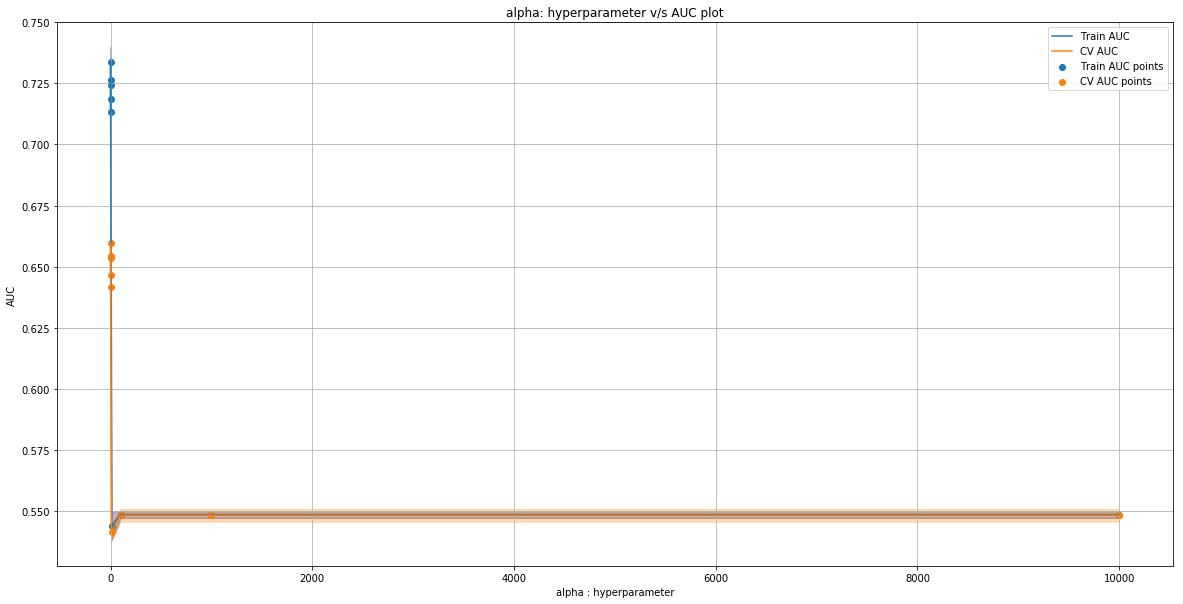

In [703]:
plt.figure(figsize=(20,10))

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

## Inference

### I was not able to deteremine an appropriate value for my parameter. So, I have re-run the GridSearchCV on a smaller set of parameter values.

In [706]:
from sklearn.linear_model import SGDClassifier 

sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[0.01, 0.05, 0.1, 0.5, 0.9, 1.5, 2.0]}

clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc')

clf.fit(final_df, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

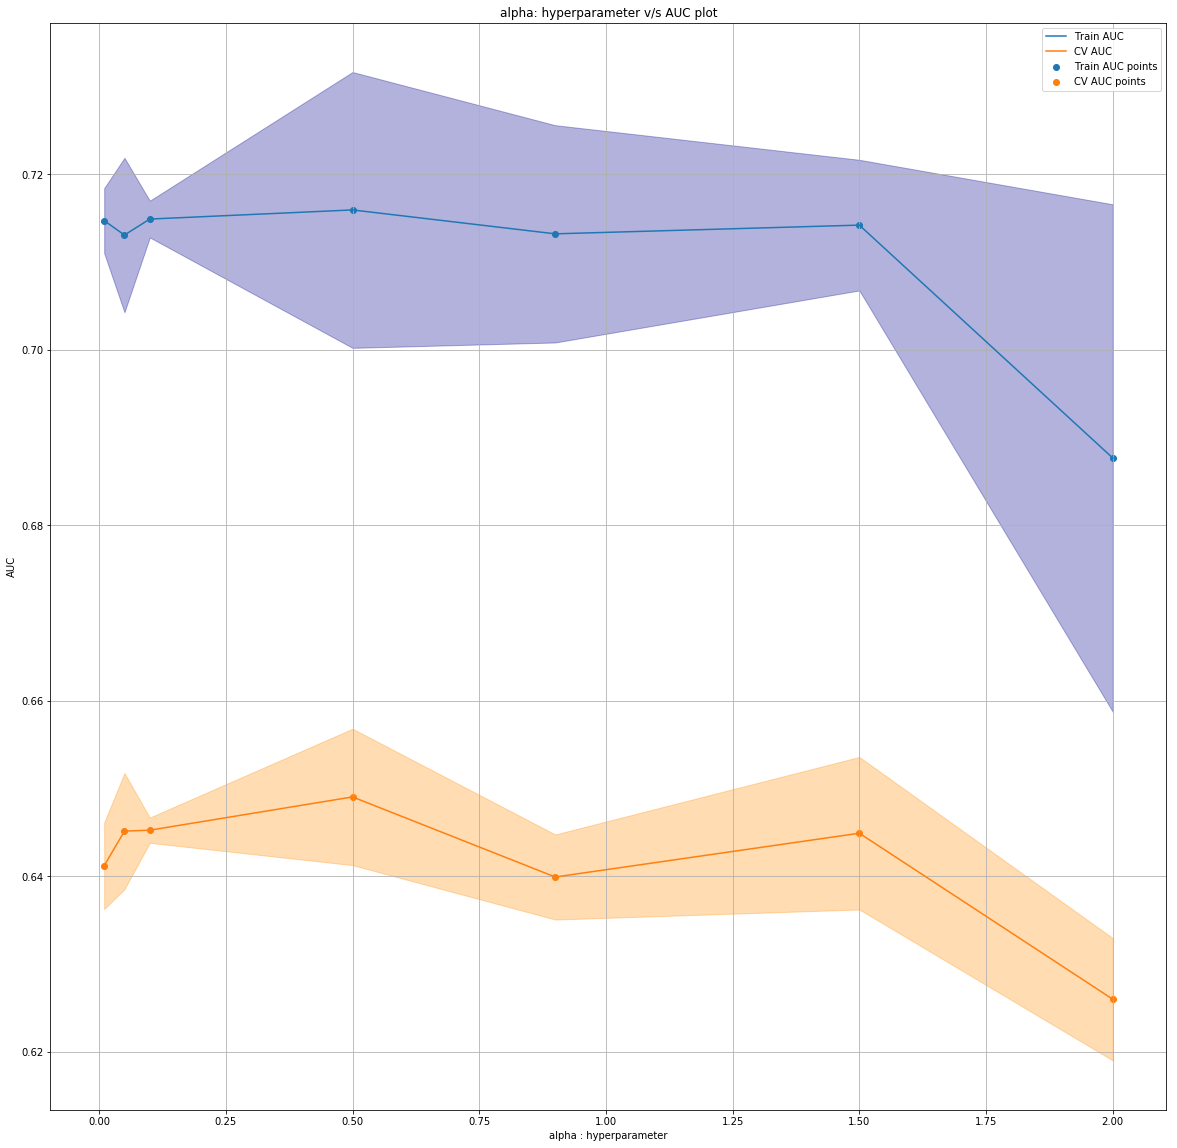

In [707]:
plt.figure(figsize=(20,20))

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

## Inference

### For L2 regularization i have considered 1.5 to be the best alpha value. 

### But, there is a huge difference in the performance of the model between the Cross Validation and Train datasets.

## B) GridSearchCV (3 fold Cross Validation - adjusted for train time issues) - L1 regularization

In [708]:
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc')

clf.fit(final_df, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

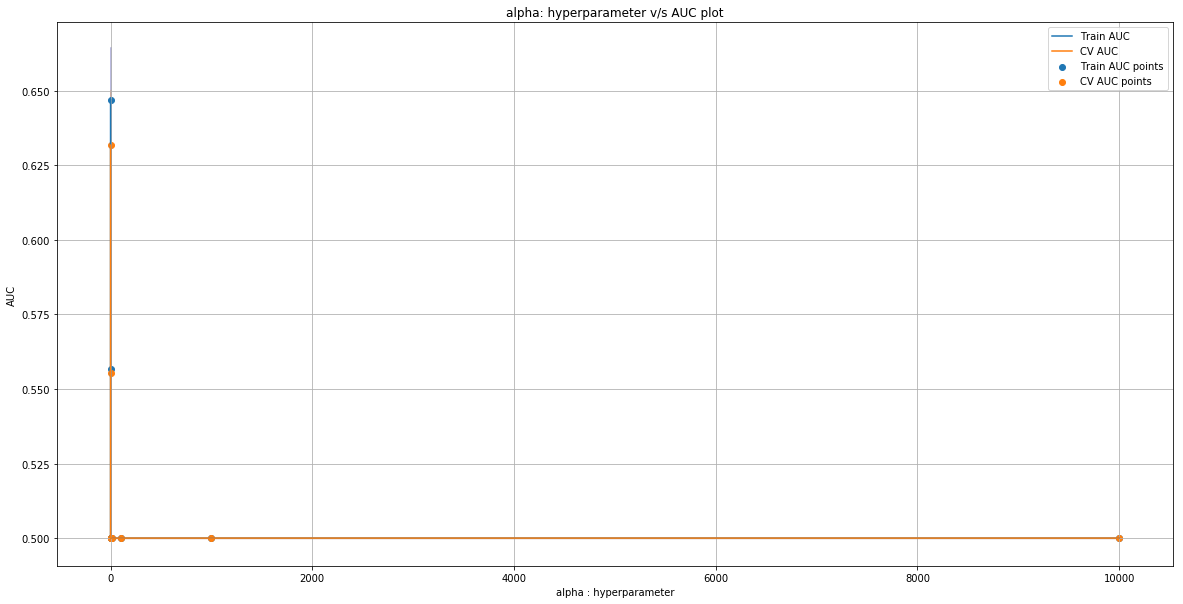

In [709]:
plt.figure(figsize=(20,10))

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

## Inference

### I was not able to deteremine an appropriate value for my parameter. So, I have re-run the GridSearchCV on a smaller set of parameter values.

In [716]:
sv = SGDClassifier(loss='hinge', penalty='l1')

parameters = {'alpha':[0.00003, 0.00006, 0.00008, 0.0001, 0.0004]}

clf = GridSearchCV(sv, parameters, cv= 3, scoring='roc_auc')

clf.fit(final_df, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

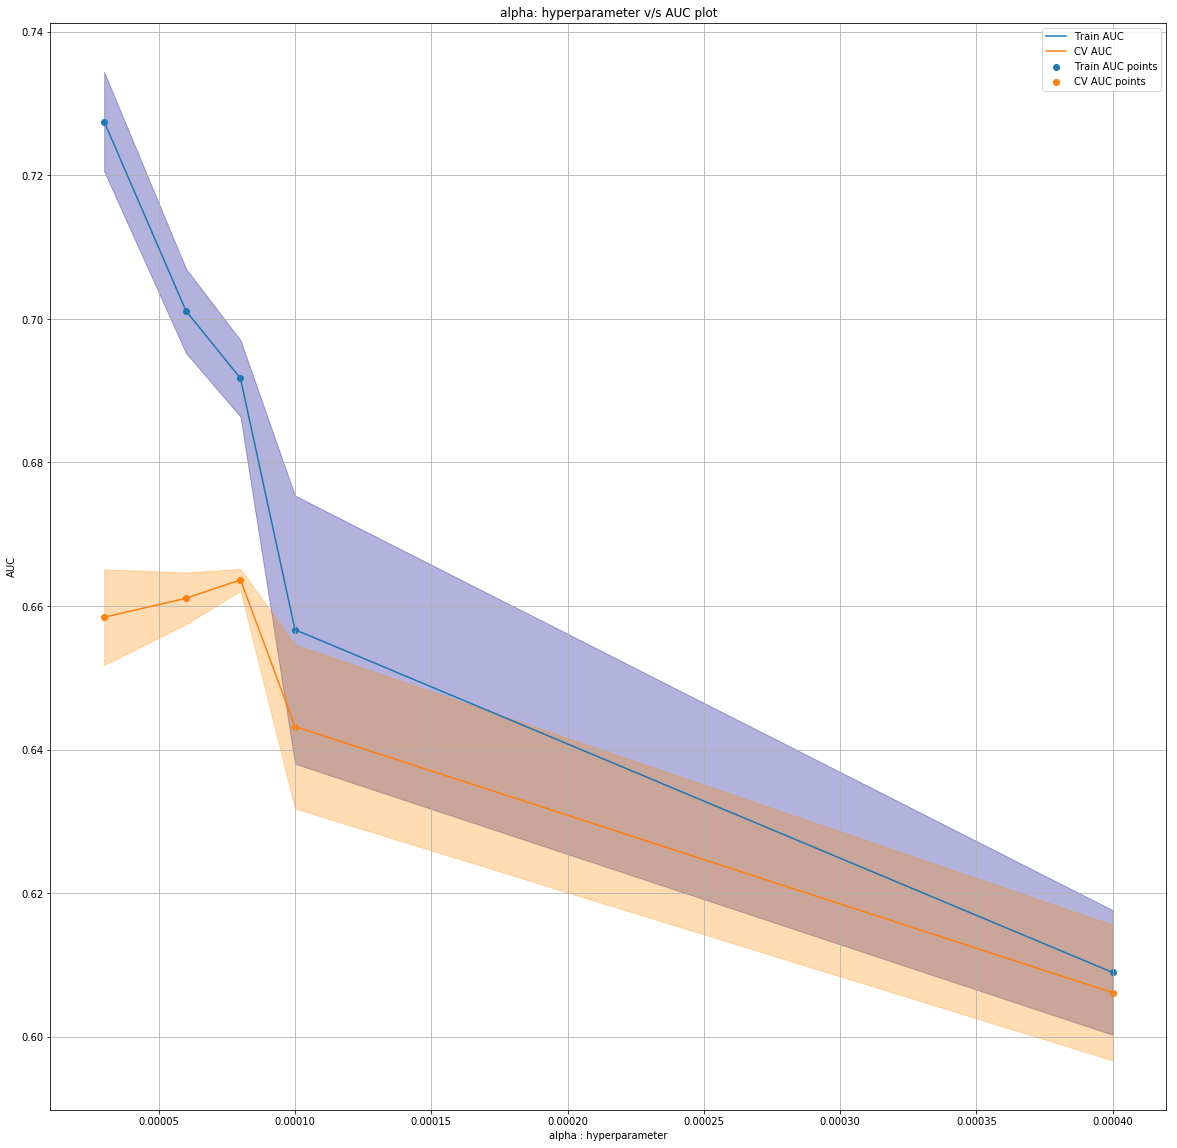

In [717]:
plt.figure(figsize=(20,20))

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

## Inference

### 0.00009 is considered as the best hyperparameter value for Alpha as it yields a better result both on training and test data.

### L1 regularization performs better and yields a better result compared to the L2 regularization, this is based on the AUC score.

## C) Train the model using the best hyper parameter value

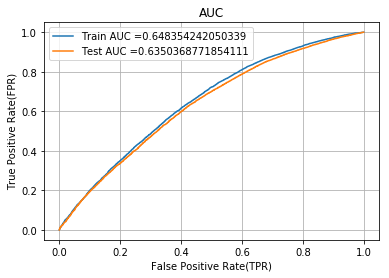

In [725]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = SGDClassifier(loss='hinge', penalty='l1', alpha=0.00009)

model.fit(final_df, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.decision_function(final_df)   
y_test_pred = model.decision_function(final_df_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## D) Confusion Matrix

### Train Data

In [726]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.25, 'for threshold', 1.064)
[[ 3713  3713]
 [11560 30055]]


In [727]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.25, 'for threshold', 1.064)


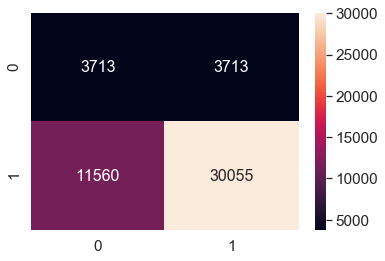

In [770]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [728]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999999161092998, 'for threshold', 1.077)
[[ 3431  2028]
 [13375 17218]]


In [729]:
conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999999161092998, 'for threshold', 1.077)


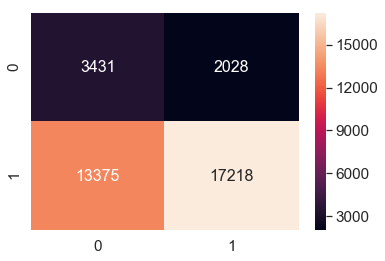

In [771]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_5, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [794]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth,min samples split)", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Decision Trees","(10, 100)", 0.665, 0.615])
x.add_row(["TFIDF", "Decision Trees", "(10, 500)", 0.653, 0.615])
x.add_row(["AVG W2V", "Decision Trees", "(5, 500)", 0.637, 0.602])
x.add_row(["TFIDF W2V", "Decision Trees", "(10, 100)", 0.586, 0.555])
x.add_row(["TFIDF-5k Features", "Linear SVM", "[L1 penalty, alpha = 0.00009]", 0.648, 0.635])


print(x)

+-------------------+----------------+----------------------------------------------+-----------+----------+
|     Vectorizer    |     Model      | Hyperparameters(max depth,min samples split) | Train AUC | Test AUC |
+-------------------+----------------+----------------------------------------------+-----------+----------+
|        BOW        | Decision Trees |                  (10, 100)                   |   0.665   |  0.615   |
|       TFIDF       | Decision Trees |                  (10, 500)                   |   0.653   |  0.615   |
|      AVG W2V      | Decision Trees |                   (5, 500)                   |   0.637   |  0.602   |
|     TFIDF W2V     | Decision Trees |                  (10, 100)                   |   0.586   |  0.555   |
| TFIDF-5k Features |   Linear SVM   |        [L1 penalty, alpha = 0.00009]         |   0.648   |  0.635   |
+-------------------+----------------+----------------------------------------------+-----------+----------+
